In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

2024-05-30 14:38:56.963716: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-30 14:38:56.967435: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-30 14:38:57.130897: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-30 14:38:57.780885: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-30 14:38:59.173297: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
# Model load: MNIST / Fashion MNIST Dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(f_image_train, f_label_train), (f_image_test, f_label_test) = fashion_mnist.load_data()
# normalized iamges
f_image_train, f_image_test = f_image_train / 255.0, f_image_test / 255.0

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

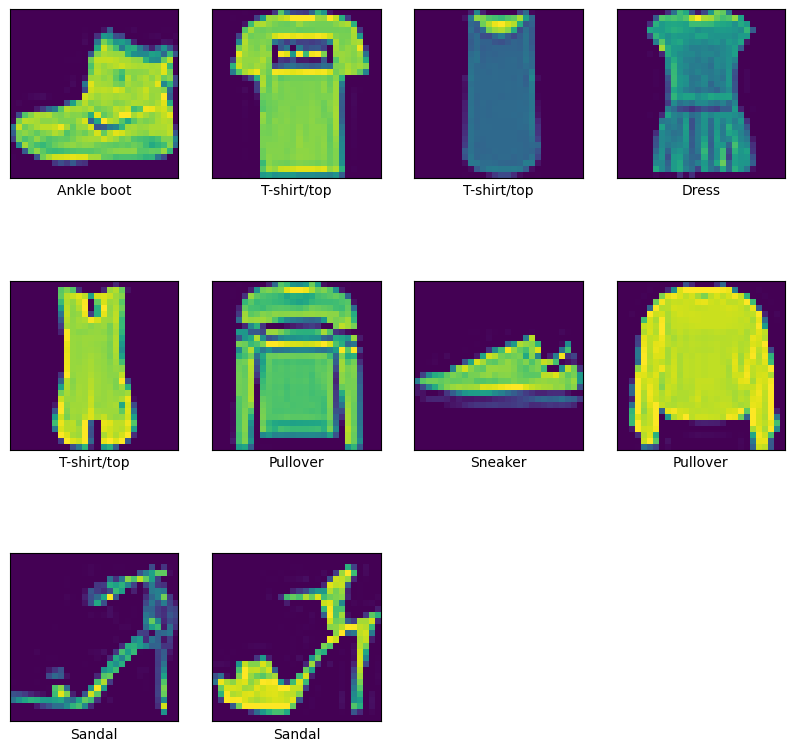

In [5]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(f_image_train[i])
    plt.xlabel(class_names[f_label_train[i]])
plt.show()

In [18]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Input, BatchNormalization, Concatenate, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
# CNN
model1 = Sequential()
model1.add(Conv2D(32,(2,2),activation="sigmoid", input_shape=(28,28,1)))
model1.add(Conv2D(64,(2,2),activation="sigmoid"))
model1.add(Conv2D(128,(2,2),2,activation="sigmoid"))
model1.add(Conv2D(32,(2,2),activation="sigmoid"))
model1.add(Conv2D(64,(2,2),activation="sigmoid"))
model1.add(Conv2D(128,(2,2),2,activation="sigmoid"))
#ANN
model1.add(Flatten())
model1.add(Dense(128,activation="sigmoid"))
model1.add(Dense(10,activation="softmax"))

In [19]:
# CNN
model2 = Sequential()
model2.add(Conv2D(32,(2,2),activation="sigmoid", input_shape=(28,28,1)))
model2.add(BatchNormalization())
model2.add(Conv2D(64,(2,2),activation="sigmoid"))
model2.add(BatchNormalization())
model2.add(Conv2D(128,(2,2),2,activation="sigmoid"))
model2.add(BatchNormalization())
model2.add(Conv2D(32,(2,2),activation="sigmoid"))
model2.add(BatchNormalization())
model2.add(Conv2D(64,(2,2),activation="sigmoid"))
model2.add(BatchNormalization())
model2.add(Conv2D(128,(2,2),2,activation="sigmoid"))
model2.add(BatchNormalization())
# ANN
model2.add(Flatten())
model2.add(Dense(128,activation="sigmoid"))
model2.add(Dense(10,activation="softmax"))

In [20]:
# CNN
model3 = Sequential()
model3.add(Conv2D(32,(2,2),activation="relu", input_shape=(28,28,1)))
model3.add(Conv2D(64,(2,2),activation="relu"))
model3.add(Conv2D(128,(2,2),2,activation="relu"))
model3.add(Conv2D(32,(2,2),activation="relu"))
model3.add(Conv2D(64,(2,2),activation="relu"))
model3.add(Conv2D(128,(2,2),2,activation="relu"))
# ANN
model3.add(Flatten())
model3.add(Dense(128,activation="sigmoid"))
model3.add(Dense(10,activation="softmax"))

In [30]:
import pickle
model1.compile( loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics=["accuracy"])
history1 = model1.fit(f_image_train,f_label_train,validation_data=(f_image_test,f_label_test), epochs=10, batch_size=100)
model1.summary()
model1.save('fashion_mnist_withoutbatch.h5')
with open('historyBatchReLu', 'wb') as file_pi:
    pickle.dump(history1.history, file_pi)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.1022 - loss: 2.3076 - val_accuracy: 0.1000 - val_loss: 2.3061
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.1011 - loss: 2.3064 - val_accuracy: 0.1000 - val_loss: 2.3050
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.0987 - loss: 2.3068 - val_accuracy: 0.1000 - val_loss: 2.3072
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.0996 - loss: 2.3066 - val_accuracy: 0.1000 - val_loss: 2.3075
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.0988 - loss: 2.3069 - val_accuracy: 0.1000 - val_loss: 2.3041
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.1007 - loss: 2.3065 - val_accuracy: 0.1000 - val_loss: 2.3058
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.1009 - loss: 2.3064 - val_accuracy: 0.1000 - val_loss: 2.3055
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.1001 - loss: 2.3058 - 

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 27, 27, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 26, 26, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 13, 13, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 12, 12, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 11, 11, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 5, 5, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,529,696 (5.84 MB)

 Trainable params: 509,898 (1.95 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,019,798 (3.89 MB)

In [32]:
model2.compile( loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics=["accuracy"])
history2 = model2.fit(f_image_train, f_label_train,validation_data=(f_image_test,f_label_test), epochs=10, batch_size=100)
model2.summary()
model2.save('fashion_mnist_withbatch.h5')
with open('historyBatchReLu', 'wb') as file_pi:
    pickle.dump(history2.history, file_pi)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - accuracy: 0.9198 - loss: 0.2153 - val_accuracy: 0.9046 - val_loss: 0.2635
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 37s 62ms/step - accuracy: 0.9335 - loss: 0.1846 - val_accuracy: 0.9062 - val_loss: 0.2614
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 37s 62ms/step - accuracy: 0.9429 - loss: 0.1587 - val_accuracy: 0.9081 - val_loss: 0.2649
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 37s 62ms/step - accuracy: 0.9489 - loss: 0.1470 - val_accuracy: 0.9089 - val_loss: 0.2617
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 37s 62ms/step - accuracy: 0.9544 - loss: 0.1294 - val_accuracy: 0.9092 - val_loss: 0.2649
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 44s 73ms/step - accuracy: 0.9582 - loss: 0.1192 - val_accuracy: 0.9103 - val_loss: 0.2622
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 45s 75ms/step - accuracy: 0.9622 - loss: 0.1102 - val_accuracy: 0.9110 - val_loss: 0.2690
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 44s 74ms/step - accuracy: 0.9673 - loss: 0.0986 - 

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 27, 27, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 27, 27, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 26, 26, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 13, 13, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 12, 12, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 11, 11, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 5, 5, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 5, 5, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,533,280 (5.85 MB)

 Trainable params: 510,794 (1.95 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 1,021,590 (3.90 MB)

In [33]:
model3.compile( loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics=["accuracy"])
history3 = model3.fit(f_image_train, f_label_train,validation_data=(f_image_test,f_label_test), epochs=10, batch_size=100)
model3.summary()
model3.save('fashion_mnist_relu.h5')
with open('historyBatchReLu', 'wb') as file_pi:
    pickle.dump(history3.history, file_pi)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.9414 - loss: 0.1591 - val_accuracy: 0.9061 - val_loss: 0.2668
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.9530 - loss: 0.1279 - val_accuracy: 0.9089 - val_loss: 0.2664
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9603 - loss: 0.1115 - val_accuracy: 0.9097 - val_loss: 0.2712
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9669 - loss: 0.0976 - val_accuracy: 0.9118 - val_loss: 0.2654
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.9726 - loss: 0.0848 - val_accuracy: 0.9140 - val_loss: 0.2683
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.9775 - loss: 0.0722 - val_accuracy: 0.9123 - val_loss: 0.2789
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9817 - loss: 0.0596 - val_accuracy: 0.9136 - val_loss: 0.2831
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9866 - loss: 0.0473 - 

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 27, 27, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 26, 26, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 13, 13, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 12, 12, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 11, 11, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 5, 5, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,529,696 (5.84 MB)

 Trainable params: 509,898 (1.95 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,019,798 (3.89 MB)

In [38]:
with open('history1', 'wb') as file_pi:
    pickle.dump(history1.history, file_pi)
with open('history2', 'wb') as file_pi:
    pickle.dump(history2.history, file_pi)
with open('history3', 'wb') as file_pi:
    pickle.dump(history3.history, file_pi)

In [39]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
historyNoBatch = pickle.load(open('./history1', "rb"))
historyBatch = pickle.load(open('./history2', "rb"))
historylelu = pickle.load(open('./history3', "rb"))
val_accNB = historyNoBatch["val_accuracy"]
val_lossNB= historyNoBatch["val_loss"]
val_lossB = historyBatch["val_loss"]
val_accB = historyBatch["val_accuracy"]
val_lossL = historylelu["val_loss"]
val_accL = historylelu["val_accuracy"]

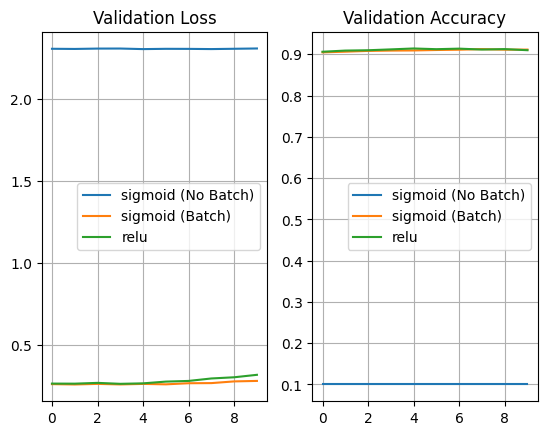

<Figure size 640x480 with 0 Axes>

In [40]:
plt.subplot(1,2,1)
plt.title('Validation Loss')
plt.plot(range(len(val_lossNB)),val_lossNB,label = "sigmoid (No Batch)")
plt.plot(range(len(val_lossB)),val_lossB,label = "sigmoid (Batch)")
plt.plot(range(len(val_lossL)),val_lossL,label = "relu")
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.title('Validation Accuracy')
plt.plot(range(len(val_accNB)),val_accNB,label = "sigmoid (No Batch)")
plt.plot(range(len(val_accB)),val_accB,label = "sigmoid (Batch)")
plt.plot(range(len(val_accL)),val_accL,label = "relu")
plt.grid()
plt.legend()
plt.show()
plt.savefig("Summary.png")